##  Super Store  Data analysis

###                            Introduction of data set¶

The given data set contains 9994 rows and 13 columns it consists country wide, region,state even city wide sales , profit 
category and sub-category

###       Problem Statement
####   Finding out the weak areas where you can work to make more profit.
####    What all business problems you can derive by looking into thedata

###  Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data set
data=pd.read_csv("SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### EDA ANALYSIS

In [8]:
import seaborn as sns

In [9]:
data['Country'].unique()

array(['United States'], dtype=object)

## so this belongs to UNited states data set

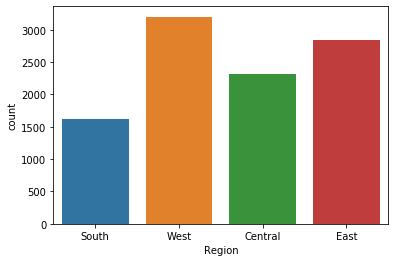

In [10]:
sns.countplot('Region',data=data)

In [11]:
data.groupby('Region')['Profit'].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

## So as we see west side region is giving more profits   


### One more thing is that the data set contains more on western side folowed by eastern, central and south 

## so it seems western side region is going with high end

In [12]:
data.groupby(['Region','State']).agg({'Sales':sum,'Profit':sum})

Sales      Profit
Region  State                                        
Central Illinois               80166.1010 -12607.8870
        Indiana                53555.3600  18382.9363
        Iowa                    4579.7600   1183.8119
        Kansas                  2914.3100    836.4435
        Michigan               76269.6140  24463.1876
        Minnesota              29863.1500  10823.1874
        Missouri               22205.1500   6436.2105
        Nebraska                7464.9300   2037.0942
        North Dakota             919.9100    230.1497
        Oklahoma               19683.3900   4853.9560
        South Dakota            1315.5600    394.8283
        Texas                 170188.0458 -25729.3563
        Wisconsin              32114.6100   8401.8004
East    Connecticut            13384.3570   3511.4918
        Delaware               27451.0690   9977.3748
        District of Columbia    2865.0200   1059.5893
        Maine                   1270.5300    454.4862
        Maryland               23705.5230   7031.1788
        Massachusetts          28634.4340   6785.5016
        New Hampshire           7292.5240   1706.5028
        New Jersey             35764.3120   9772.9138
        New York              310876.2710  74038.5486
        Ohio                   78258.1360 -16971.3766
        Pennsylvania          116511.9140 -15559.9603
        Rhode Island           22627.9560   7285.6293
        Vermont                 8929.3700   2244.9783
        West Virginia           1209.8240    185.9216
South   Alabama                19510.6400   5786.8253
        Arkansas               11678.1300   4008.6871
        Florida                89473.7080  -3399.3017
        Georgia                49095.8400  16250.0433
        Kentucky               36591.7500  11199.6966
        Louisiana               9217.0300   2196.1023
        Mississippi            10771.3400   3172.9762
        North Carolina         55603.1640  -7490.9122
        South Carolina          8481.7100   1769.0566
        Tennessee              30661.8730  -5341.6936
        Virginia               70636.7200  18597.9504
West    Arizona                35282.0010  -3427.9246
        California            457687.6315  76381.3871
        Colorado               32108.1180  -6527.8579
        Idaho                   4382.4860    826.7231
        Montana                 5589.3520   1833.3285
        Nevada                 16729.1020   3316.7659
        New Mexico              4783.5220   1157.1161
        Oregon                 17431.1500  -1190.4705
        Utah                   11220.0560   2546.5335
        Washington            138641.2700  33402.6517
        Wyoming                 1603.1360    100.1960

## These are the State wise  sales:Profit ratio

In [13]:
a=data.groupby(['Region','State']).agg({'Sales':min,'Profit':max})
a

Sales     Profit
Region  State                                    
Central Illinois                 0.836   874.9875
        Indiana                  1.980  8399.9760
        Iowa                     5.400   394.2680
        Kansas                   5.760   149.3820
        Michigan                 2.200  4946.3700
        Minnesota                3.750  4630.4755
        Missouri                 7.640  2302.9671
        Nebraska                 5.040   743.9880
        North Dakota             2.480   162.0948
        Oklahoma                 3.520   523.7052
        South Dakota             2.970   132.5898
        Texas                    0.444   624.9875
        Wisconsin                1.810   673.8816
East    Connecticut              3.520   294.6710
        Delaware                 3.380  5039.9856
        District of Columbia     9.640   648.5624
        Maine                    8.260   131.3550
        Maryland                 1.640  1270.9900
        Massachusetts            3.150   503.7822
        New Hampshire           14.820   517.4793
        New Jersey               3.760  2365.9818
        New York                 1.240  3919.9888
        Ohio                     1.448   607.6080
        Pennsylvania             0.852  1119.9968
        Rhode Island             2.220  2591.9568
        Vermont                  2.040  1013.1270
        West Virginia            6.240   219.4416
South   Alabama                  3.620  1459.2000
        Arkansas                 4.300   843.1706
        Florida                  1.167   327.5922
        Georgia                  1.780  3177.4750
        Kentucky                 2.610  1416.8000
        Louisiana                3.890   346.0396
        Mississippi              6.160   388.8128
        North Carolina           1.752   303.8040
        South Carolina           6.460   422.5100
        Tennessee                1.584   223.9936
        Virginia                 2.840  2799.9840
West    Arizona                  1.408   211.4955
        California               0.990  1906.4850
        Colorado                 1.080   247.9960
        Idaho                    3.304   259.5297
        Montana                  6.096  1379.9770
        Nevada                   3.640  1644.2913
        New Mexico               4.170   138.3552
        Oregon                   1.080   228.0792
        Utah                     4.960   449.9850
        Washington               1.344  6719.9808
        Wyoming               1603.136   100.1960

##  AS we see places like washington, california and virginia  from west 
##  EAST:- states like MARYLAND,Newyork,Pennsylvania 
##  Central:- states like Indiana ,Texas gives good amount of profit


In [14]:
data.groupby(['Region','State','City']).agg({'Sales':sum,'Profit':sum})

Sales      Profit
Region  State      City                                     
Central Illinois   Arlington Heights      14.112      1.2348
                   Aurora               7572.968  -1894.7196
                   Bloomington           963.940   -432.1283
                   Bolingbrook           218.308     -4.6610
                   Buffalo Grove         831.399    -89.6478
...                                          ...         ...
West    Washington Renton               1242.632    185.4324
                   Seattle            119540.742  29156.0967
                   Spokane              2027.918    172.2261
                   Vancouver             686.836     75.4546
        Wyoming    Cheyenne             1603.136    100.1960

[604 rows x 2 columns]

In [18]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

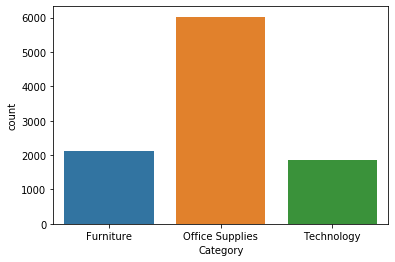

In [24]:
sns.countplot('Category',data=data)

In [21]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [20]:
#number of products in each sub-category
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

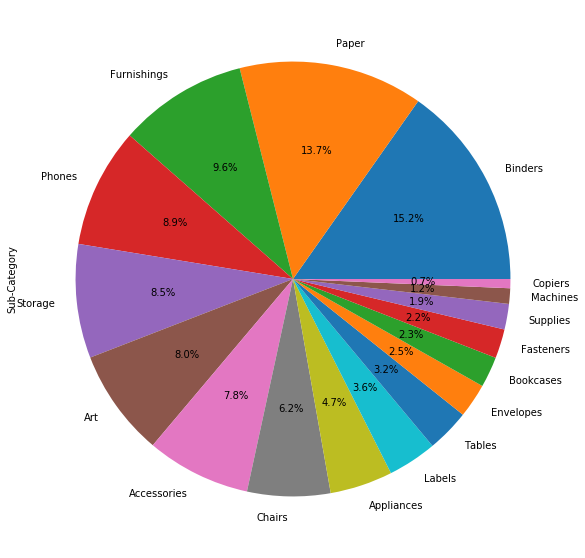

In [25]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [28]:
a=data.groupby('Category').agg({'Sales':sum,'Profit':sum})
print(a)
type(a)

                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Total Profit and Sales per Category')

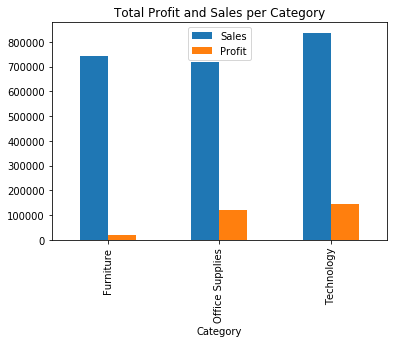

In [30]:
a.plot.bar()
plt.title('Total Profit and Sales per Category')

# AS we see technology and office supplies gives good profit

                    Sales      Profit
Sub-Category                         
Accessories   167380.3180  41936.6357
Appliances    107532.1610  18138.0054
Art            27118.7920   6527.7870
Binders       203412.7330  30221.7633
Bookcases     114879.9963  -3472.5560
Chairs        328449.1030  26590.1663
Copiers       149528.0300  55617.8249
Envelopes      16476.4020   6964.1767
Fasteners       3024.2800    949.5182
Furnishings    91705.1640  13059.1436
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Paper          78479.2060  34053.5693
Phones        330007.0540  44515.7306
Storage       223843.6080  21278.8264
Supplies       46673.5380  -1189.0995
Tables        206965.5320 -17725.4811


Text(0.5, 1.0, 'Total Profit and Sales per Category')

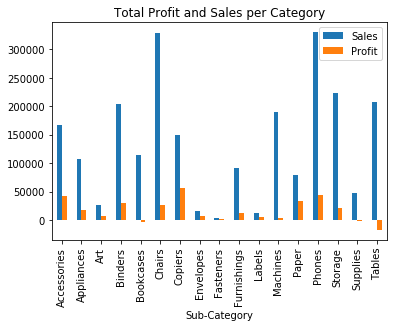

In [32]:
a=data.groupby('Sub-Category').agg({'Sales':sum,'Profit':sum})
print(a)
a.plot.bar()
plt.title('Total Profit and Sales per Category')

# AS we see Tables,Suppliers gives loss ...  and as we see there are more sales in phones ,copies to make profit out there

# as we see Machines are going huge sales but very less profit.. 

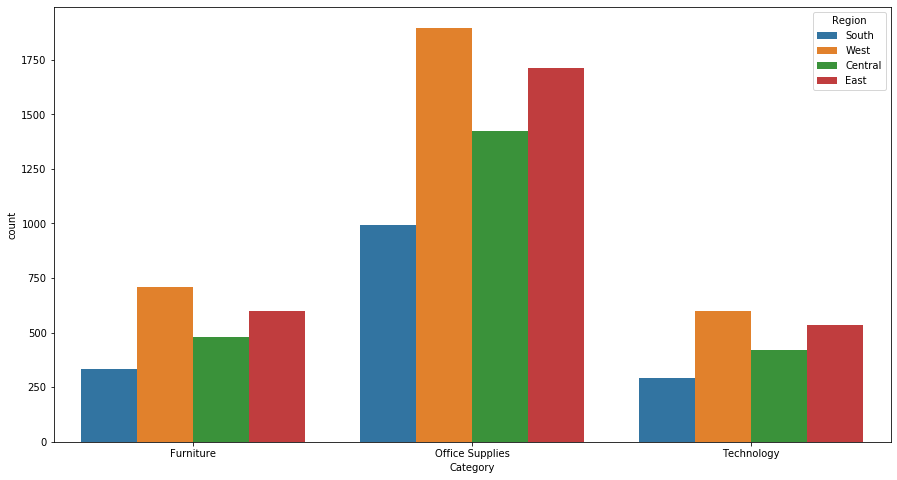

In [37]:
#Count of Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Category", hue="Region", data=data)
plt.show()


# as we see western's are more using superstore and we see people purchase more on office supplies category

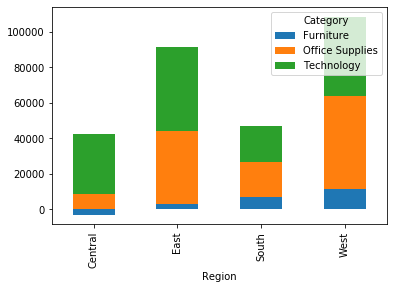

In [52]:
pd.crosstab(data["Region"],data["Category"],data["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)


# visualization on profit - region

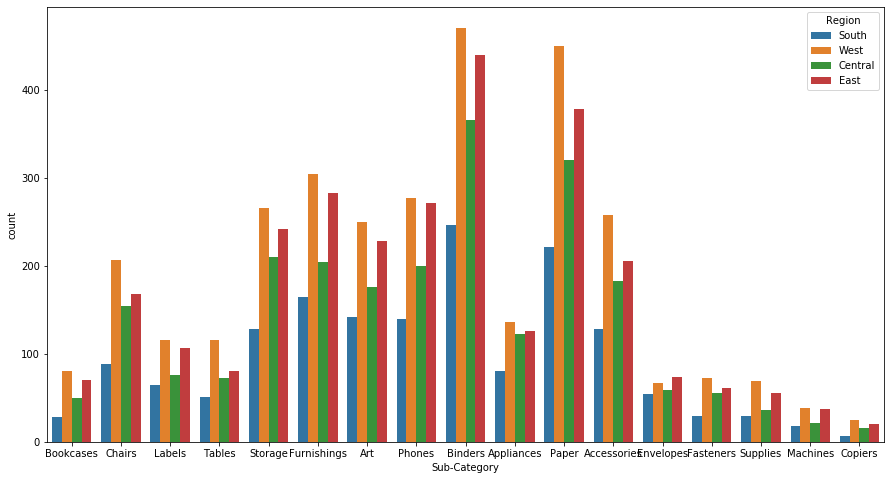

In [38]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()


# These are with sub-category wise............ which region people buys on which sub-category items most as we see western are more on to Binders and papers

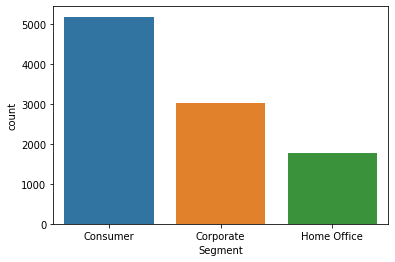

In [40]:
sns.countplot('Segment',data=data)

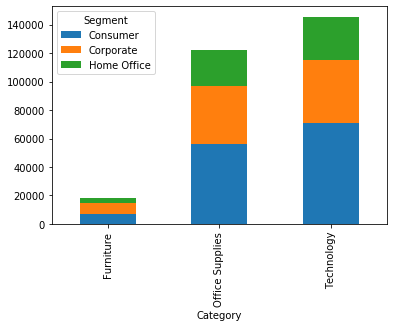

In [60]:
pd.crosstab(index=data["Category"],columns=data["Segment"],values=data["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

In [53]:
data.groupby('Segment').agg({'Sales':sum,'Profit':sum})

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


# lets see the relation between sales to profit

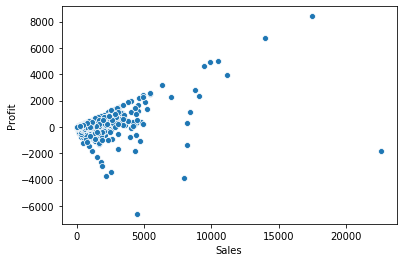

In [54]:
sns.scatterplot('Sales','Profit',data=data)

# Mostly sales increases profits too increases.. there were slight negative in some products too

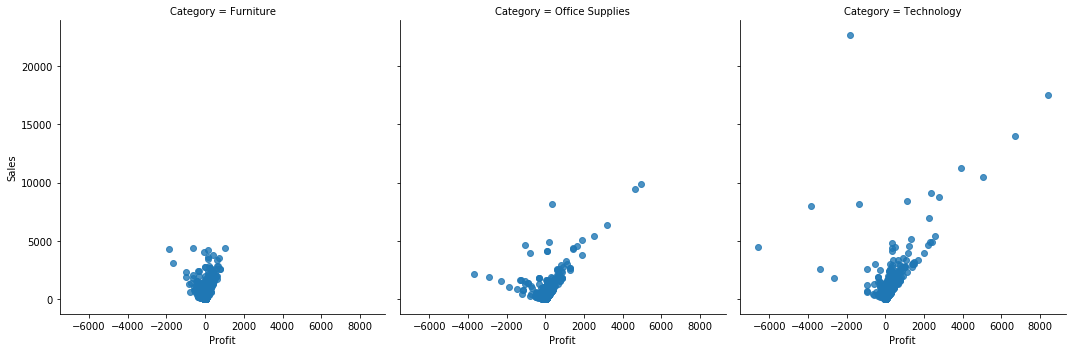

In [56]:
sns.lmplot(x="Profit",y="Sales",data=data,fit_reg=False,col="Category")
plt.show()

# AS we see there were more profits in technology side  and furniture is low.. 

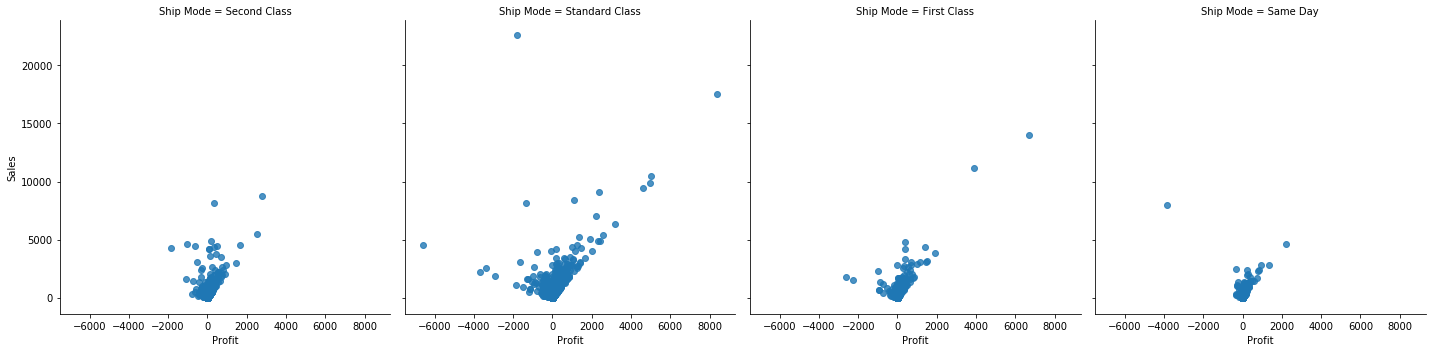

In [58]:
sns.lmplot(x="Profit",y="Sales",data=data,fit_reg=False,col="Ship Mode")

# AS we see more profit on standard class and mostly  there is not much time loss in same day

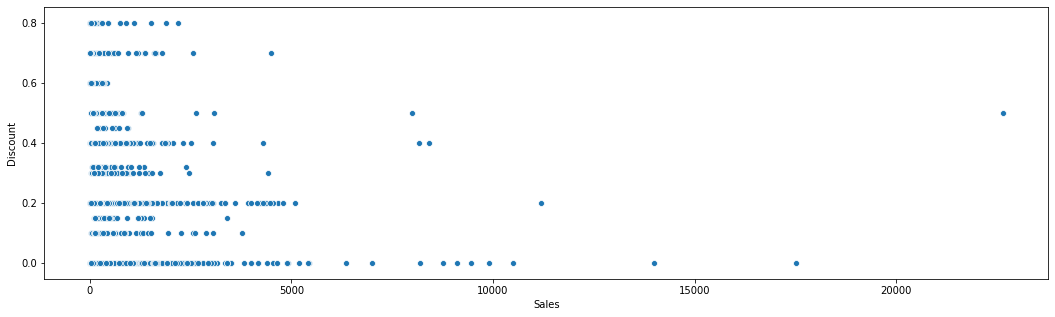

In [55]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot('Sales','Discount',data=data)

# AS we see if disccount is increasing  sales are decreasing

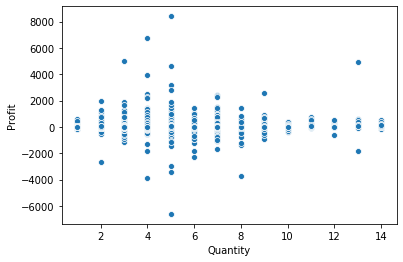

In [59]:
sns.scatterplot("Quantity","Profit",data=data)

## if the quantity is 4 , 5 there is success amount of profits

## if it exceeds it gradually decreases 

## conclusion and suggestions

####    1.The profit is more from the west and east region of the country.

####   2.Although office supplies is the most selling category 
####     but the profit is highest from the technology sector Under which the the profit has come more from the
####     Consumers segment

####   3.Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.

#### 4.The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day" 

#### 5.There is a  loss from the furniture section

#### 6.Till the discount is 0.3  there is good  amount of  profit,
####    But if the discount increases beyond 0.3 then comes the loss

##### 7.If the quantity is of 4 or 5 there is good amount ... but if they increase quantity then  profits  starts  reduce  

##### 8.AS we see states like washington, maryland, newyork texas , california most populated side of country and getting profit 
##### and then in Technology side

## suggestions:-

## 1.So company should focus more on populated states and too in technology section




 ## 2.There were categories like furniture which occurs loss so we can reduce production on them take limited  go accordingly where (furniture) sale is good
    

## 3. Discount should not exceed 0.3



## 4. coming to shipping must wage more rates on same date delivery .. To get profits